# Robotics, Vision & Control 3e: for Python
## Chapter 4: Mobile Robot Vehicles

Copyright (c) 2021- Peter Corke

In [51]:
try:
    from google.colab import output
    print('Running on CoLab')
    #!pip install roboticstoolbox-python>=1.0.2
    !pip install git+https://github.com/petercorke/robotics-toolbox-python@future
    !pip install spatialmath-python>=1.1.5
    !pip install --no-deps rvc3python
    !pip install bdsim
    COLAB = True
except ModuleNotFoundError:
    COLAB = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
from IPython.display import HTML

%matplotlib inline
import matplotlib.pyplot as plt

# add RTB examples folder to the path
import sys, os.path
import RVC3 as rvc
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# helper function to run bdsim in a subprocess and transfer results using a pickle file
import pickle
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool+".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print(cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# ------ standard imports ------ #
import numpy as np
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *


Running on CoLab
  Cloning https://github.com/petercorke/robotics-toolbox-python (to revision future) to /tmp/pip-req-build-2psasmk4
  Running command git clone --filter=blob:none --quiet https://github.com/petercorke/robotics-toolbox-python /tmp/pip-req-build-2psasmk4
  Running command git checkout -b future --track origin/future
  Switched to a new branch 'future'
  Branch 'future' set up to track remote branch 'future' from 'origin'.
  Resolved https://github.com/petercorke/robotics-toolbox-python to commit 6188446a943f6c4d830b4d79b0a36b45cd3e7084
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


# 4.1 Wheeled Mobile Robots


## 4.1.1 Car-Like Mobile Robots


<div style="background-color:red">
<span style="background-color:red; font-size:20pt">NOTE</span>

There are issues in running bdsim from inside Jupyter.  We have two options, disable all graphics (which is a bit dull) or run bdsim from a subprocess with its own popout windows.

For Colab we can only do the first option.  

Otherwise, we use the wrapper function `run_shell()` defined in the first cell to spawn a new Python instance to run the block diagram which will pop up new windows on your screen to display a simple animation showing the vehicle's motion in the plane.  This makes it a bit harder to get parameters and data between Jupyter and the `bdsim` simulation, so:
* parameter values are passed to `bdsim` as `--global` command line options.
* the `-o` command line option to `bdsim` causes it to write results as a pickle file, which are then imported back into Jupyter.</div>

* Creates Fig 4.5
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌────────────┬───────────┬────────┬──────────┬─────────────────────┐
│   block    │   type    │ inport │  source  │     source type     │
├────────────┼───────────┼────────┼──────────┼─────────────────────┤
│ scopexy1.0 │ scopexy1  │ 0      │ vehicle  │ ndarray(3,).float64 │
├────────────┼───────────┼────────┼──────────┼─────────────────────┤
│ speed      │ constant  │        │          │                     │
├────────────┼───────────┼────────┼──────────┼─────────────────────┤
│ steering@  │ piecewise │        │          │                     │
├────────────┼───────────┼────────┼──────────┼─────────────────────┤
│ vehicle    │ bicycle   │ 0      │ speed    │ int                 │
│            │           │ 1      │ steering │ int                 │
└────────────┴───────────┴────────┴──────────┴─────────────────────┘

Note: @ = event source


>>> Start simula

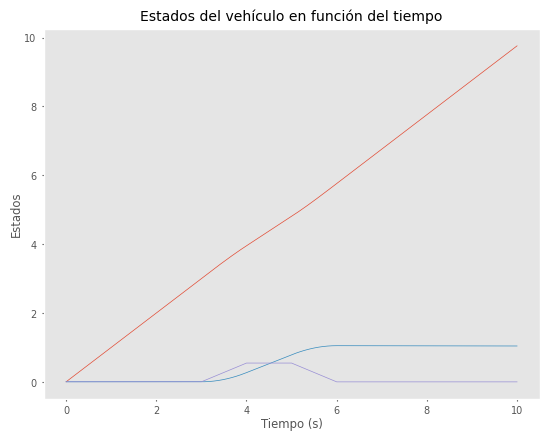

In [52]:
if COLAB:
    %run -m lanechange -H -g  # Sin gráficos en Colab
else:
    run_shell("lanechange")

# Graficar estados vs tiempo
t = out.t
x = out.x
plt.figure()
plt.plot(t, x)
plt.xlabel("Tiempo (s)")
plt.ylabel("Estados")
plt.title("Estados del vehículo en función del tiempo")
plt.grid()
plt.show()

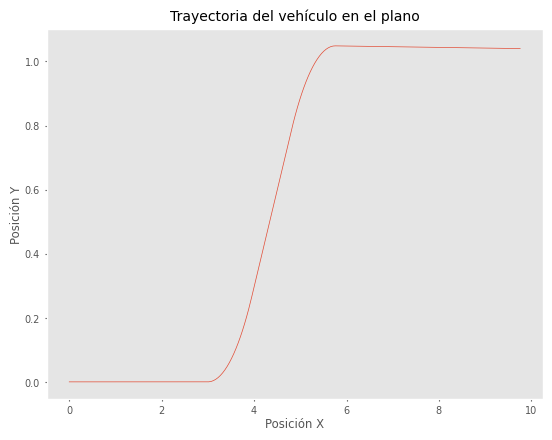

In [53]:
# Graficar trayectoria (x vs y)
plt.figure(1)
plt.plot(x[:, 0], x[:, 1])
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Trayectoria del vehículo en el plano")
plt.grid()
plt.show()

In [54]:
plt.close(1)

### 4.1.1.1 Driving to a Point


attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 4.7
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌───────────────┬─────────────┬────────┬────────────┬─────────────────────┐
│     block     │    type     │ inport │   source   │     source type     │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ function.0    │ function    │ 0      │ sum.0      │ ndarray(2,).float64 │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ function.1    │ function    │ 0      │ sum.0      │ ndarray(2,).float64 │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ gain.0        │ gain        │ 0      │ function.0 │ float               │
├───────────────┼─────────────┼───

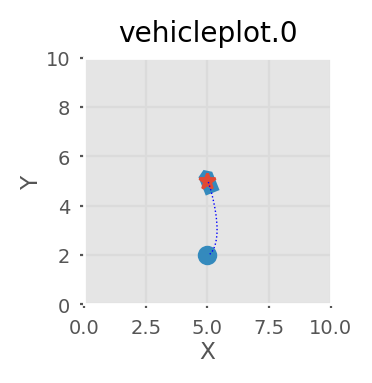

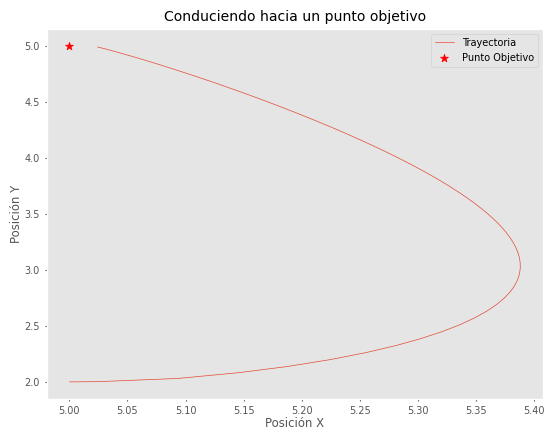

In [55]:
pgoal = (5, 5)
qs = (8, 5, pi / 2)
if COLAB:
    %run -i -m drivepoint -H -g
else:
    run_shell("drivepoint", pgoal=pgoal, qs=qs)

# Graficar trayectoria hacia el punto
q = out.x
plt.figure()
plt.plot(q[:, 0], q[:, 1], label="Trayectoria")
plt.scatter(pgoal[0], pgoal[1], c='r', marker='*', label="Punto Objetivo")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Conduciendo hacia un punto objetivo")
plt.legend()
plt.grid()
plt.show()

### 4.1.1.2 Driving Along a Line


attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 4.9
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌───────────────┬─────────────┬────────┬────────────┬─────────────────────┐
│     block     │    type     │ inport │   source   │     source type     │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ Kd            │ gain        │ 0      │ function.0 │ float64             │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ Kh            │ gain        │ 0      │ sum.0      │ float               │
├───────────────┼─────────────┼────────┼────────────┼─────────────────────┤
│ constant.0    │ constant    │        │            │                     │
├───────────────┼─────────────┼───

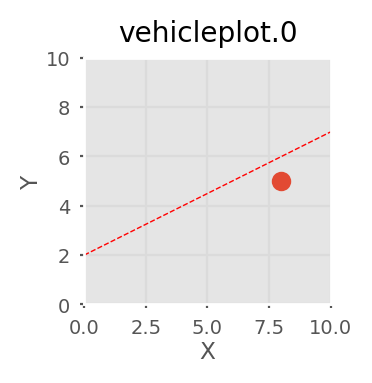

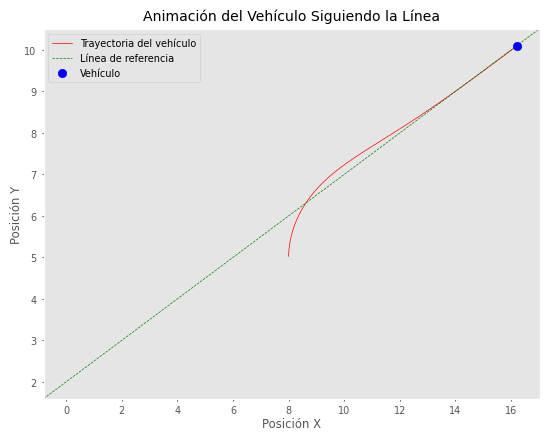

In [57]:
L = (1, -2, 4)
qs = (8, 5, pi / 2)
if COLAB:
    %run -m driveline -H -g
else:
    run_shell("driveline", L=L, qs=qs)

# Graficar la trayectoria y la línea de referencia
q = out.x
plt.figure()
plt.plot(q[:, 0], q[:, 1], label="Trayectoria del vehículo", color="red")
plt.axline((0, -L[2]/L[1]), slope=-L[0]/L[1], color='green', linestyle='--', label="Línea de referencia")
plt.scatter(q[-1, 0], q[-1, 1], color='blue', label="Vehículo", zorder=5)
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Animación del Vehículo Siguiendo la Línea")
plt.legend()
plt.grid()
plt.show()

# 4.1.1.3 Driving Along a Path

Simulación: Driving Along a Path...
Ejecutando comando: python /usr/local/lib/python3.11/dist-packages/RVC3/models/drivepursuit.py -H +a -o
Graficando resultados...


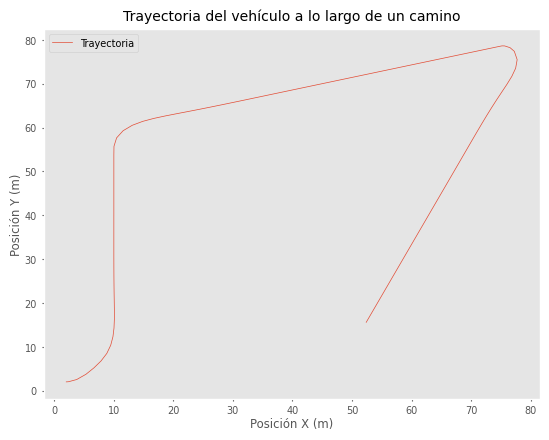

In [86]:
import os, sys, pickle
import matplotlib.pyplot as plt
import numpy as np
import RVC3 as rvc

# Configurar la ruta de modelos de RVC3
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# Función para ejecutar bdsim en un subproceso
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool + ".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print("Ejecutando comando:", cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# Ejecutar la simulación usando el modelo 'drivepursuit'
print("Simulación: Driving Along a Path...")
run_shell("drivepursuit")

# Visualizar resultados
print("Graficando resultados...")
q = out.x  # Configuración del vehículo vs tiempo

# Graficar la trayectoria del vehículo
plt.figure()
plt.plot(q[:, 0], q[:, 1], label="Trayectoria")
plt.title("Trayectoria del vehículo a lo largo de un camino")
plt.xlabel("Posición X (m)")
plt.ylabel("Posición Y (m)")
plt.legend()
plt.grid()
plt.show()

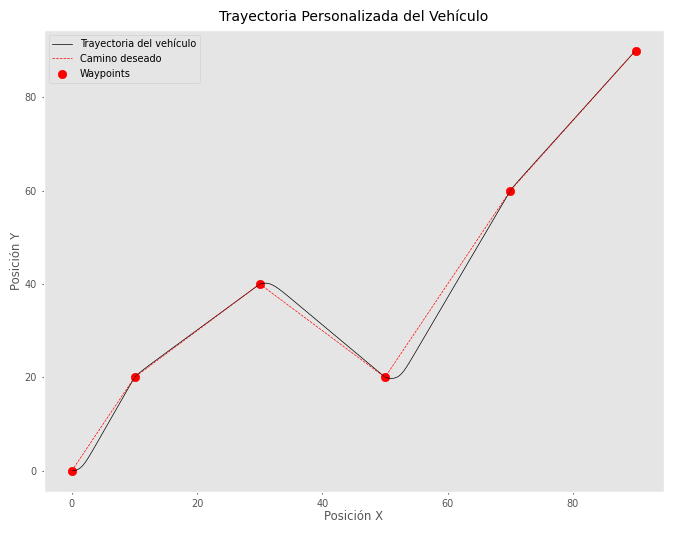

In [75]:
#
veh = Bicycle(speed_max=1, steer_max=np.deg2rad(30))  # Crear modelo del vehículo

# Desactivar gráficos interactivos
veh._animation = False  # Forzamos que no use animación
veh._timer = None  # Evitar temporizadores gráficos

# Definir waypoints
waypoints = [(0, 0), (10, 20), (30, 40), (50, 20), (70, 60), (90, 90)]

# Simular el movimiento del vehículo a través de los waypoints
trajectory = []
for wp in waypoints:
    while np.linalg.norm(veh.q[:2] - np.array(wp)) > 0.5:  # Mientras no llegue al waypoint
        direction = np.arctan2(wp[1] - veh.q[1], wp[0] - veh.q[0]) - veh.q[2]
        veh.step([0.5, direction])  # Ajustar velocidad y dirección
        trajectory.append(veh.q.copy())

trajectory = np.array(trajectory)

# Graficar la trayectoria simulada
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trayectoria del vehículo", color="black")
plt.plot(np.array(waypoints)[:, 0], np.array(waypoints)[:, 1], linestyle='--', color='red', label="Camino deseado")
plt.scatter(np.array(waypoints)[:, 0], np.array(waypoints)[:, 1], color='red', label="Waypoints")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Trayectoria Personalizada del Vehículo")
plt.legend()
plt.grid()
plt.show()


(1925, 2)
attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 4.11
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌───────────────┬─────────────┬────────┬──────────────┬─────────────────────┐
│     block     │    type     │ inport │    source    │     source type     │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ Kh            │ gain        │ 0      │ herr         │ float               │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ bicycle.0     │ bicycle     │ 0      │ speed        │ int                 │
│               │             │ 1      │ Kh           │ float               │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ close

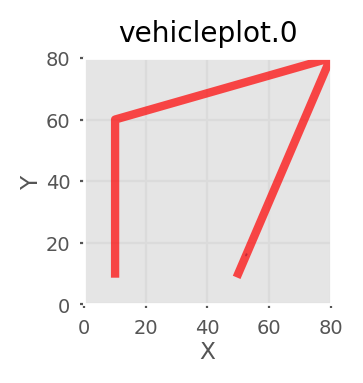

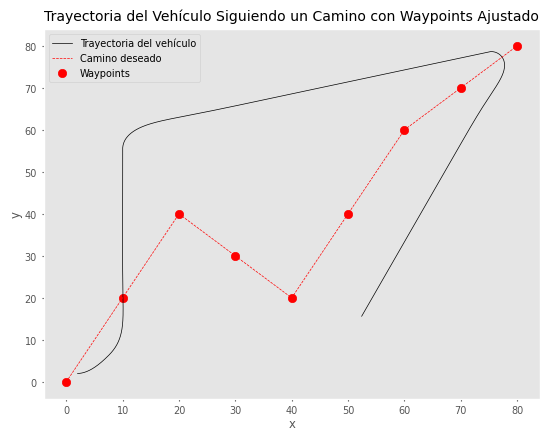

In [66]:
if COLAB:
    %run -m drivepursuit -H -g
else:
   run_shell("drivepursuit", global_lookahead="5.0")
# Graficar la trayectoria a lo largo de un camino
q = out.x
# Waypoints ajustados para mejorar la densidad
waypoints = [(0, 0), (10, 20), (20, 40), (30, 30), (40, 20), (50, 40), (60, 60), (70, 70), (80, 80)]
waypoints = np.array(waypoints)
plt.figure()
plt.plot(q[:, 0], q[:, 1], label="Trayectoria del vehículo", color="black")
plt.plot(waypoints[:, 0], waypoints[:, 1], linestyle='--', color='red', label="Camino deseado")
plt.scatter(waypoints[:, 0], waypoints[:, 1], color='red', label="Waypoints")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria del Vehículo Siguiendo un Camino con Waypoints Ajustado")
plt.legend()
plt.grid()
plt.show()


### 4.1.1.4 Driving to a Configuration


attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 4.14
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
alpha -1.5707963267948966
set direction to  1
┌───────────────┬─────────────┬────────┬──────────────┬─────────────────────┐
│     block     │    type     │ inport │    source    │     source type     │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ Kalpha        │ gain        │ 0      │ polar[2]     │ float64             │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ Kbeta         │ gain        │ 0      │ sum.1        │ float               │
├───────────────┼─────────────┼────────┼──────────────┼─────────────────────┤
│ Krho          │ gain        │ 0      │ polar[1]

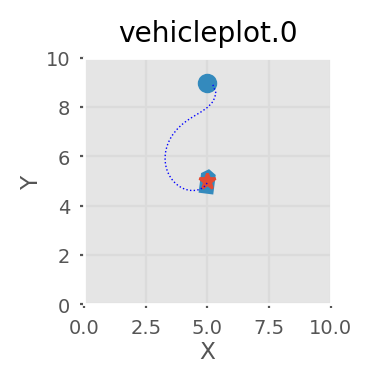

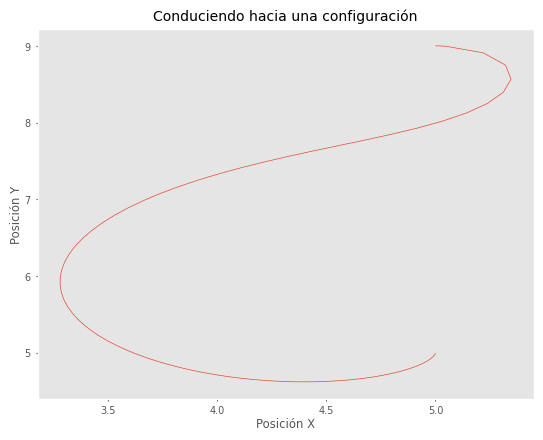

In [83]:
qg = (5, 5, pi / 2)
qs = (9, 5, 0)
if COLAB:
    %run -m driveconfig -H -g
else:
    run_shell("driveconfig", qg=qg, qs=qs)

# Graficar configuración
q = out.x
plt.figure()
plt.plot(q[:, 0], q[:, 1])
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Conduciendo hacia una configuración")
plt.grid()
plt.show()

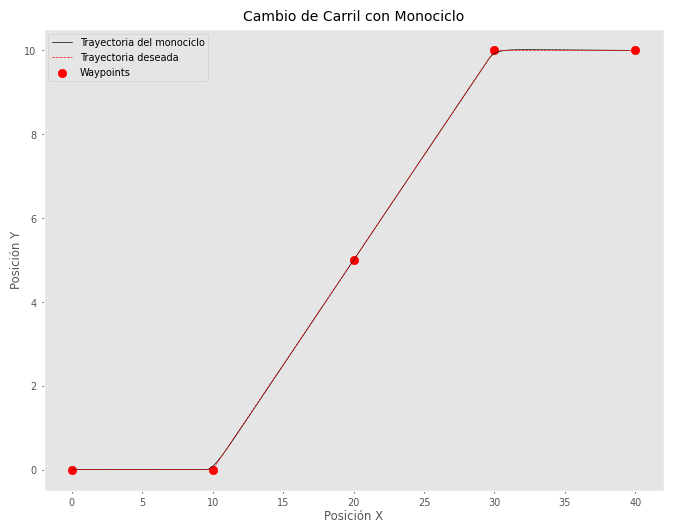

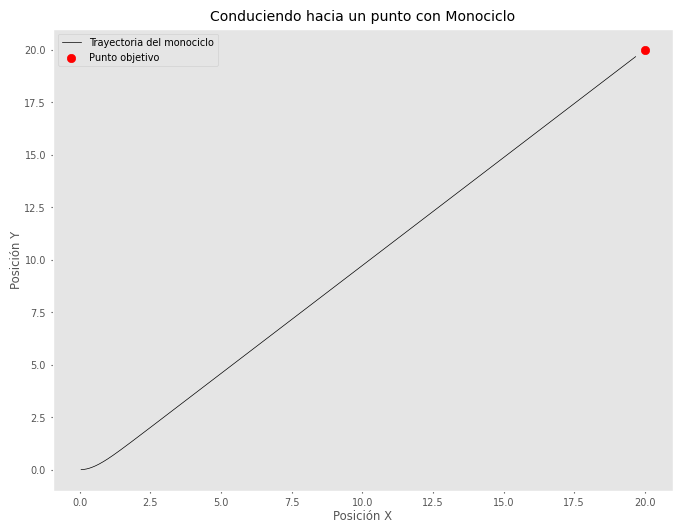

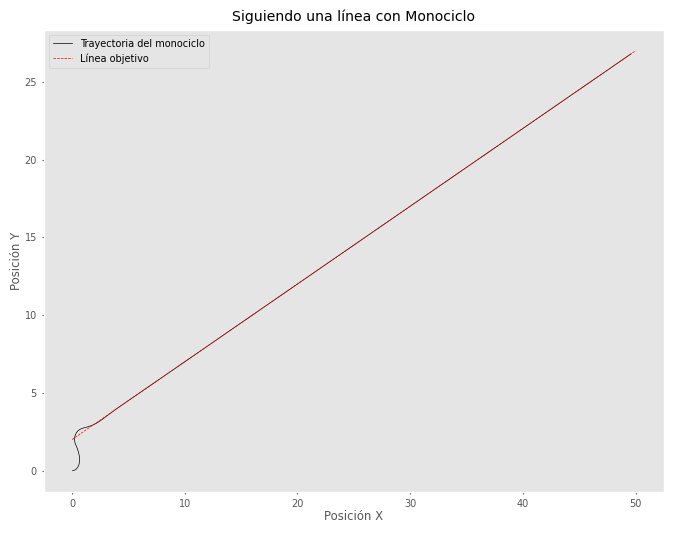

In [84]:
# 4.1.2 Modelo del Monociclo con Control Diferencial

class Unicycle:
    def __init__(self, speed_max=1.0, omega_max=np.deg2rad(45)):
        """
        Inicialización del modelo del monociclo.
        :param speed_max: Velocidad máxima lineal (m/s).
        :param omega_max: Velocidad angular máxima (rad/s).
        """
        self.q = np.array([0, 0, 0])  # Estado inicial [x, y, theta]
        self.speed_max = speed_max
        self.omega_max = omega_max

    def step(self, u, dt=0.1):
        """
        Avanzar el estado del monociclo en un paso.
        :param u: Control [v, omega].
        :param dt: Paso de tiempo.
        """
        v, omega = np.clip(u, [-self.speed_max, -self.omega_max], [self.speed_max, self.omega_max])
        self.q += np.array([v * np.cos(self.q[2]), v * np.sin(self.q[2]), omega]) * dt

    def deriv(self, u):
        """
        Derivadas del estado.
        :param u: Control [v, omega].
        """
        v, omega = np.clip(u, [-self.speed_max, -self.omega_max], [self.speed_max, self.omega_max])
        return np.array([v * np.cos(self.q[2]), v * np.sin(self.q[2]), omega])

# ==================================
# 4.1.2.1 Cambio de Carril
# ==================================
# Crear el modelo del monociclo
unicycle = Unicycle(speed_max=1.0, omega_max=np.deg2rad(45))
unicycle.q = [0, 0, 0]  # Estado inicial del monociclo

# Waypoints para el cambio de carril
waypoints = [(0, 0), (10, 0), (20, 5), (30, 10), (40, 10)]

# Simular el movimiento del monociclo para el cambio de carril
trajectory = []
for wp in waypoints:
    while np.linalg.norm(unicycle.q[:2] - np.array(wp)) > 0.5:  # Mientras no alcance el waypoint
        direction = np.arctan2(wp[1] - unicycle.q[1], wp[0] - unicycle.q[0]) - unicycle.q[2]
        unicycle.step([0.5, direction], dt=0.1)
        trajectory.append(unicycle.q.copy())

trajectory = np.array(trajectory)

# Graficar la trayectoria del cambio de carril
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trayectoria del monociclo", color="black")
plt.plot(np.array(waypoints)[:, 0], np.array(waypoints)[:, 1], linestyle='--', color='red', label="Trayectoria deseada")
plt.scatter(np.array(waypoints)[:, 0], np.array(waypoints)[:, 1], color='red', label="Waypoints")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Cambio de Carril con Monociclo")
plt.legend()
plt.grid()
plt.show()

# ==================================
# 4.1.2.2 Conduciendo hacia un punto
# ==================================
# Crear el modelo del monociclo
unicycle = Unicycle(speed_max=1.0, omega_max=np.deg2rad(45))
unicycle.q = [0, 0, 0]  # Estado inicial del monociclo

# Punto objetivo
pgoal = (20, 20)

# Simular el movimiento del monociclo hacia el punto
trajectory = []
while np.linalg.norm(unicycle.q[:2] - np.array(pgoal)) > 0.5:  # Mientras no alcance el punto objetivo
    direction = np.arctan2(pgoal[1] - unicycle.q[1], pgoal[0] - unicycle.q[0]) - unicycle.q[2]
    unicycle.step([0.5, direction], dt=0.1)
    trajectory.append(unicycle.q.copy())

trajectory = np.array(trajectory)

# Graficar la trayectoria hacia el punto
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trayectoria del monociclo", color="black")
plt.scatter(pgoal[0], pgoal[1], color='red', label="Punto objetivo")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Conduciendo hacia un punto con Monociclo")
plt.legend()
plt.grid()
plt.show()

# ==================================
# 4.1.2.3 Siguiendo una línea
# ==================================
# Crear el modelo del monociclo
unicycle = Unicycle(speed_max=1.0, omega_max=np.deg2rad(45))
unicycle.q = [0, 0, 0]  # Estado inicial del monociclo

# Definir la línea
line = lambda x: 0.5 * x + 2  # Línea y = 0.5x + 2

# Simular el movimiento del monociclo siguiendo la línea
trajectory = []
for x in np.linspace(0, 50, 200):
    y_line = line(x)
    while np.linalg.norm(unicycle.q[:2] - np.array([x, y_line])) > 0.5:
        direction = np.arctan2(y_line - unicycle.q[1], x - unicycle.q[0]) - unicycle.q[2]
        unicycle.step([0.5, direction], dt=0.1)
        trajectory.append(unicycle.q.copy())

trajectory = np.array(trajectory)

# Graficar la trayectoria siguiendo la línea
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1], label="Trayectoria del monociclo", color="black")
plt.plot(np.linspace(0, 50, 200), line(np.linspace(0, 50, 200)), linestyle='--', color='red', label="Línea objetivo")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Siguiendo una línea con Monociclo")
plt.legend()
plt.grid()
plt.show()


Simulación: Driving to a Point...
Ejecutando comando: python /usr/local/lib/python3.11/dist-packages/RVC3/models/drivepoint.py -H +a -o --global "pgoal=(5, 5)" --global "qs=(8, 5, 1.5707963267948966)"
Graficando resultados...


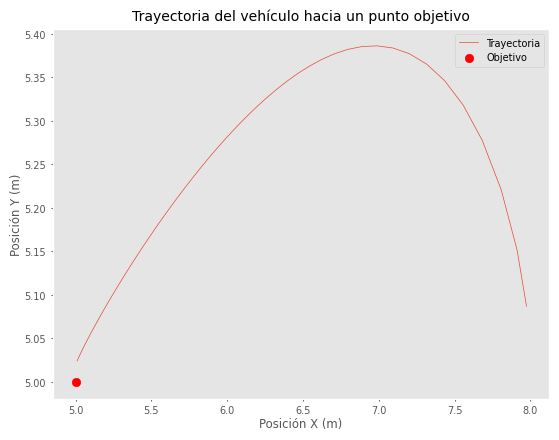

In [85]:
import os, sys, pickle
import matplotlib.pyplot as plt
import numpy as np
from spatialmath.base import *
import RVC3 as rvc

# Configurar la ruta de modelos de RVC3
sys.path.append(os.path.join(rvc.__path__[0], 'models'))

# Función wrapper para ejecutar bdsim en un subproceso
def run_shell(tool, **params):
    global out
    pyfile = os.path.join(rvc.__path__[0], "models", tool + ".py")
    cmd = f"python {pyfile} -H +a -o"
    for key, value in params.items():
        cmd += f' --global "{key}={value}"'
    print("Ejecutando comando:", cmd)
    os.system(cmd)
    with open("bd.out", "rb") as f:
        out = pickle.load(f)

# Parámetros del ejercicio: posición objetivo y configuración inicial
pgoal = (5, 5)                  # Posición objetivo (x, y)
qs = (8, 5, np.pi / 2)          # Configuración inicial (x, y, θ)

# Ejecutar la simulación usando el modelo drivepoint
print("Simulación: Driving to a Point...")
run_shell("drivepoint", pgoal=pgoal, qs=qs)

# Visualizar resultados
print("Graficando resultados...")
q = out.x  # Configuración del vehículo vs tiempo

# Graficar la trayectoria en el plano XY
plt.figure()
plt.plot(q[:, 0], q[:, 1], label="Trayectoria")
plt.scatter([pgoal[0]], [pgoal[1]], color='red', zorder=5, label="Objetivo")
plt.xlabel("Posición X (m)")
plt.ylabel("Posición Y (m)")
plt.title("Trayectoria del vehículo hacia un punto objetivo")
plt.legend()
plt.grid()
plt.show()

# 4.2 Aerial Robots


attempt to programmatically set option animation=True is overriden by command line option animation=False, ignored
attempt to programmatically set option graphics=True is overriden by command line option graphics=False, ignored
* Creates Fig 4.24
* Robotics, Vision & Control for Python, P. Corke, Springer 2023.
* Copyright (c) 2021- Peter Corke

Compiling:
┌───────────────────────┬─────────────────┬────────┬────────────────────┬─────────────────────┐
│         block         │      type       │ inport │       source       │     source type     │
├───────────────────────┼─────────────────┼────────┼────────────────────┼─────────────────────┤
│ absval                │ function        │ 0      │ mixer              │ ndarray(4,).float64 │
├───────────────────────┼─────────────────┼────────┼────────────────────┼─────────────────────┤
│ attitude              │ scope           │ 0      │ slice1.1           │ ndarray(3,).float64 │
├───────────────────────┼─────────────────┼────────┼─────────────

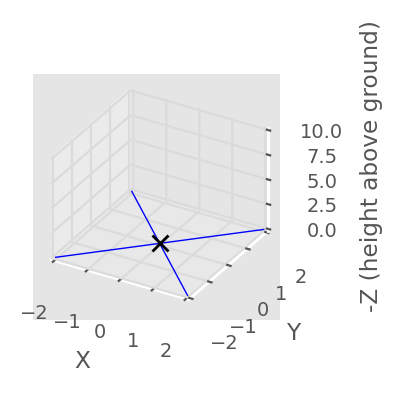


<<< Simulation complete
  block diagram evaluations: 1294
  block diagram exec time:   1.778 ms
  time steps:                213
  integration intervals:     2



In [ ]:
if COLAB:
  %run -m quadrotor -H -g  # no graphics
else:
  run_shell("quadrotor")

In [ ]:
t = out.t; x = out.x;
x.shape

(213, 12)

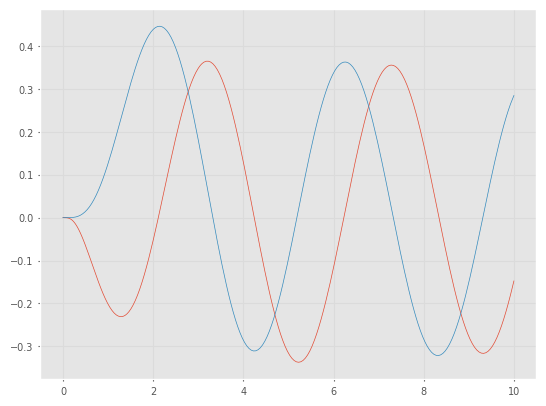

In [ ]:
plt.plot(t, x[:, 0], t, x[:, 1]);

# 4.4 Wrapping Up


## 4.4.1 Further Reading


In [ ]:
veh = Bicycle(speed_max=1, steer_max=np.deg2rad(30));
veh.q

array([       0,        0,        0])

In [ ]:
veh.step([0.3, 0.2])
veh.q

AttributeError: 'Bicycle' object has no attribute '_animation'

In [ ]:
veh.deriv(veh.q, [0.3, 0.2])

array([     0.3, 0.001824,  0.06081])